In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
import datetime as dt
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap
import pylab as pl
import matplotlib.animation as animation

<IPython.core.display.Javascript object>


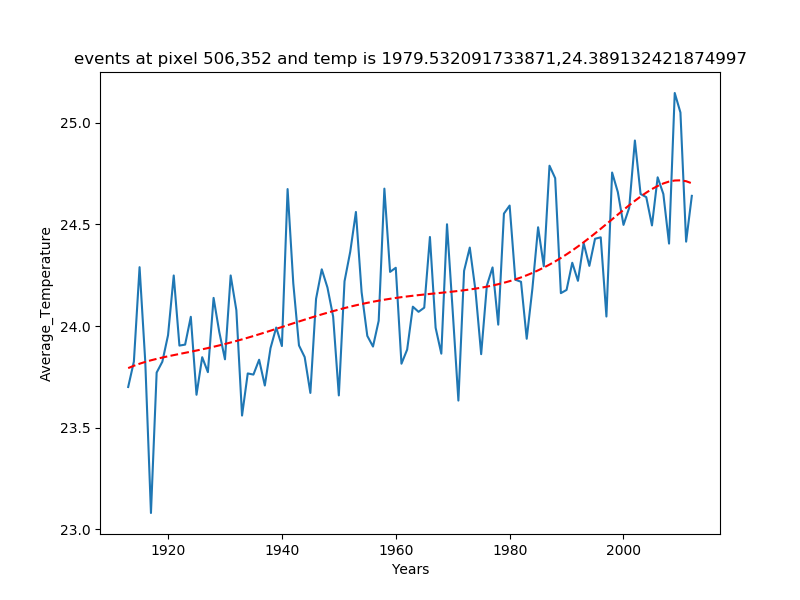

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RankWarning: Polyfit may be poorly conditioned


6

In [19]:
df_GlobalLandTemperaturesByCountry=pd.read_csv(r'C:\Users\vivek\Downloads\climate-change-earth-surface-temperature-data\GlobalLandTemperaturesByCountry.csv')

df_India=df_GlobalLandTemperaturesByCountry[df_GlobalLandTemperaturesByCountry['Country']=="India"].dropna()
df_India.reset_index(inplace=True,drop=True)
df_GlobalLandTemperaturesByCountry['dt']=pd.to_datetime(df_GlobalLandTemperaturesByCountry.dt)
df_India['dt']=pd.to_datetime(df_India['dt'])
df_India['year']=df_India['dt'].map(lambda x : x.year)
max_temp=df_India['year'].max()
time_period=range(1913,2013)
average_temperature=[]
for year in time_period:
    average_temperature.append(df_India[df_India['year']==year]['AverageTemperature'].mean())
plt.figure(figsize=(8,6))
plt.plot(time_period,average_temperature)
plt.xlabel('Years')
plt.ylabel('Average_Temperature')
plt.title('Average_temperature_Over_years')
z=np.polyfit(time_period,average_temperature,10)
p=np.poly1d(z)
plt.plot(time_period,p(time_period),'r--')
plt.show()
def onclick(event):
    plt.gca().set_title('events at pixel {},{} and temp is {},{}'.format(event.x,event.y,event.xdata,event.ydata))
plt.gcf().canvas.mpl_connect('button_press_event',onclick)

<IPython.core.display.Javascript object>


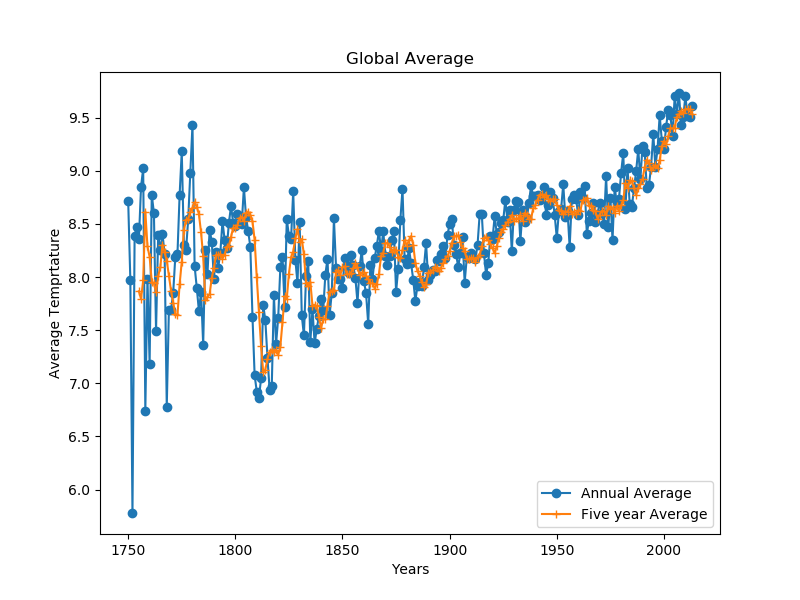

6

In [21]:
df_GlobalTemperatures=pd.read_csv(r'C:\Users\vivek\Downloads\climate-change-earth-surface-temperature-data\GlobalTemperatures.csv')
df_GlobalTemperatures['dt']=pd.to_datetime(df_GlobalTemperatures['dt'])
df_GlobalTemperatures['year']=df_GlobalTemperatures['dt'].dt.year

year_average=[]
for i in range(1750,2014):
    year_average.append(df_GlobalTemperatures[df_GlobalTemperatures['year']==i]['LandAverageTemperature'].mean())

five_year=[]
year_range=range(1750,2014)
for i in range(1755,2019):
    a=[]
    for j in range(i-5,i):
        a.append(df_GlobalTemperatures[df_GlobalTemperatures['year']==(j-5)]['LandAverageTemperature'].mean())
    five_year.append(sum(a)/float(len(a)))

np_year_avg=np.array(year_average)
np_five_year_avg=np.array(five_year)

plt.figure(figsize=(8,6))
plt.plot(year_range,year_average,'-o',label='Annual Average')
plt.plot(year_range,five_year,'-+',label='Five year Average')
plt.title('Global Average')
plt.xlabel('Years')
plt.ylabel('Average Temprtature')
plt.legend()
def onclick(event):
    plt.gca().set_title('events at pixel {},{} and year,temp is {},{}'.format(event.x,event.y,event.xdata,event.ydata))
plt.gcf().canvas.mpl_connect('button_press_event',onclick)

<IPython.core.display.Javascript object>


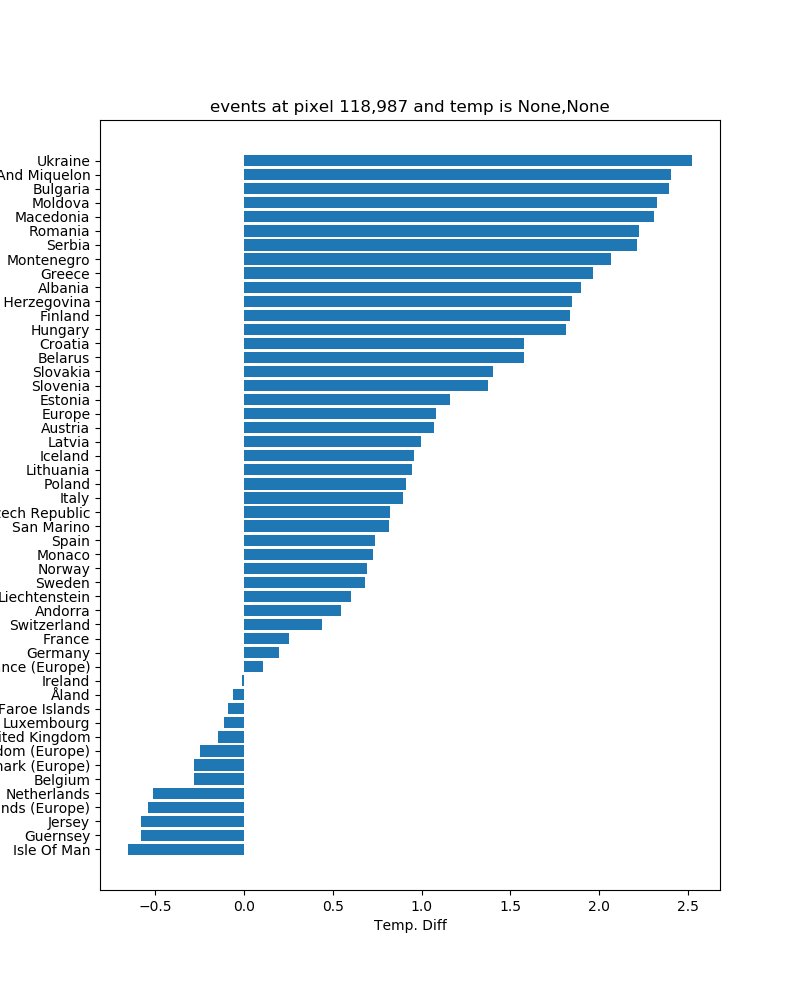

6

In [22]:
Temp_data=pd.read_csv(r'C:\Users\vivek\Downloads\climate-change-earth-surface-temperature-data\GlobalLandTemperaturesByCountry.csv')

Temp_data['dt']=pd.to_datetime(Temp_data.dt)
Temp_data['year']=Temp_data['dt'].map(lambda x: x.year)
Temp_data=Temp_data.dropna()

grouped_data=Temp_data['AverageTemperature'].groupby([Temp_data['year'],Temp_data['Country']]).mean()
grouped_dict=grouped_data.to_dict()

Temp={}
countries=Temp_data['Country'].unique()

firstYeardata=grouped_data[1750]
lastYeardata=grouped_data[2013]

for country in countries:
    if (country in firstYeardata)==True and (country in lastYeardata)==True:
        Temp[country]=(lastYeardata[country]-firstYeardata[country])

Temp1=sorted(Temp.items(),key=lambda x: x[1]) 
Countries_list=[x for x,y in Temp1]
Temp_diff=[y for x,y in Temp1]

plt.figure(figsize=(8,10))
ax=plt.subplot()
ax.barh(range(len(Countries_list)),Temp_diff)
plt.yticks(range(len(Countries_list)),Countries_list)
plt.title('Temperature Difference of countries')
plt.xlabel('Temp. Diff')
plt.show()
def onclick(event):
    plt.gca().set_title('events at pixel {},{} and temp is {},{}'.format(event.x,event.y,event.xdata,event.ydata))
plt.gcf().canvas.mpl_connect('button_press_event',onclick)

<IPython.core.display.Javascript object>


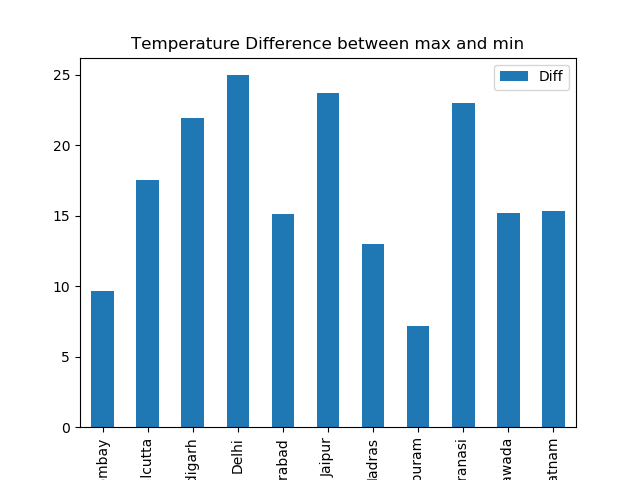

<IPython.core.display.Javascript object>


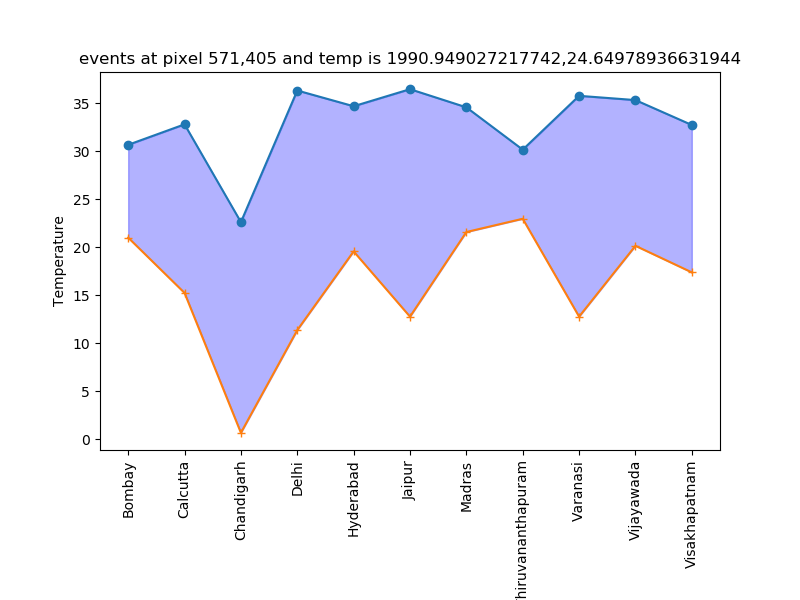

6

In [18]:
df_GlobalLandTemperaturesByCity=pd.read_csv(r'C:\Users\vivek\Downloads\climate-change-earth-surface-temperature-data\GlobalLandTemperaturesByCity.csv')

df_indiancities=df_GlobalLandTemperaturesByCity[df_GlobalLandTemperaturesByCity['Country']=='India']
cities_list=df_indiancities['City'].unique()
major_cities=['Delhi','Bombay','Calcutta','Madras','Varanasi','Chandigarh','Dehradun','Jaipur','Hyderabad','Thiruvananthapuram','Vijayawada','Visakhapatnam']
col_to_keep=['dt','AverageTemperature','City']
df_indian_cities=df_indiancities.filter(col_to_keep)
df_indian_cities.dropna(inplace=True)
df_indian_cities.reset_index(inplace=True,drop=True)
temp_max=[]
temp_min=[]
city_list=[]
for city in cities_list:
    if (city in major_cities):
        temp=df_indian_cities[df_indian_cities['City']==city]['AverageTemperature']
        temp_max.append(temp.max())
        temp_min.append(temp.min())
        city_list.append(city)
df_major_cities=pd.DataFrame({'Tempmax':temp_max,
                             'Tempmin':temp_min,
                              'Mcity':city_list
                             })
difference=[]
for td in range(0,len(df_major_cities)):
    tempdifference=df_major_cities['Tempmax'].iloc[td]-df_major_cities['Tempmin'].iloc[td]
    difference.append(tempdifference)
df_major_cities['Diff']=df_major_cities['Tempmax']-df_major_cities['Tempmin']
df_major_cities.plot('Mcity','Diff',kind='bar')
plt.title('Temperature Difference between max and min')
def onclick(event):
    plt.gca().set_title('events at pixel {},{} and temp is {},{}'.format(event.x,event.y,event.xdata,event.ydata))
plt.gcf().canvas.mpl_connect('button_press_event',onclick)

plt.figure(figsize=(8,6))
plt.plot(df_major_cities['Mcity'],df_major_cities['Tempmax'],'-o')
plt.plot(df_major_cities['Mcity'],df_major_cities['Tempmin'],'-+')
plt.fill_between(range(len(df_major_cities['Tempmax'])),df_major_cities['Tempmax'],df_major_cities['Tempmin'],color='blue',alpha=0.3)
ax1=plt.gca()
ax1.set_xlabel('Cities')
ax1.set_ylabel('Temperature')
ax1.set_title('Max-Min Temperture Trend')
a=plt.gca().xaxis
for items in a.get_ticklabels():
    items.set_rotation(90)
plt.subplots_adjust(bottom=0.25)
def onclick(event):
    plt.gca().set_title('events at pixel {},{} and temp is {},{}'.format(event.x,event.y,event.xdata,event.ydata))
plt.gcf().canvas.mpl_connect('button_press_event',onclick)